In [1]:
#IMPORTAR LIBRERÍAS
#Advertencias
import warnings
warnings.filterwarnings('ignore')

#Tratamiento de datos 
import pandas as pd
import numpy as np

#Gráficos
import matplotlib.pyplot as plt
import seaborn as sb

#Preparación de datos
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn import set_config

#Modelado
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#Evaluación4
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#IMPORTAR DATOS
datos = pd.read_csv(r'C:\Users\maria\Downloads\riesgo_credito.csv')

In [3]:
datos.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [4]:
datos.tail()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [5]:
datos.drop('Unnamed: 0', axis = 1, inplace = True)
datos.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
#EXPLORACIÓN DE DATOS
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [7]:
#Eliminar variable Checking account
datos.drop('Checking account', axis = 1, inplace = True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              1000 non-null   int64 
 1   Sex              1000 non-null   object
 2   Job              1000 non-null   int64 
 3   Housing          1000 non-null   object
 4   Saving accounts  817 non-null    object
 5   Credit amount    1000 non-null   int64 
 6   Duration         1000 non-null   int64 
 7   Purpose          1000 non-null   object
 8   Risk             1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [8]:
#Imputar datos nulos de Saving accounts con la moda
modaSavingAccounts = datos['Saving accounts'].mode()
modaSavingAccounts

0    little
Name: Saving accounts, dtype: object

In [9]:
datos['Saving accounts'].fillna(modaSavingAccounts[0], inplace = True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              1000 non-null   int64 
 1   Sex              1000 non-null   object
 2   Job              1000 non-null   int64 
 3   Housing          1000 non-null   object
 4   Saving accounts  1000 non-null   object
 5   Credit amount    1000 non-null   int64 
 6   Duration         1000 non-null   int64 
 7   Purpose          1000 non-null   object
 8   Risk             1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [10]:
#Exploración estadística de datos
datos.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [11]:
datos.describe(include = 'object')

,Sex,Housing,Saving accounts,Purpose,Risk
count,1000,1000,1000,1000,1000
unique,2,3,4,8,2
top,male,own,little,car,good
freq,690,713,786,337,700


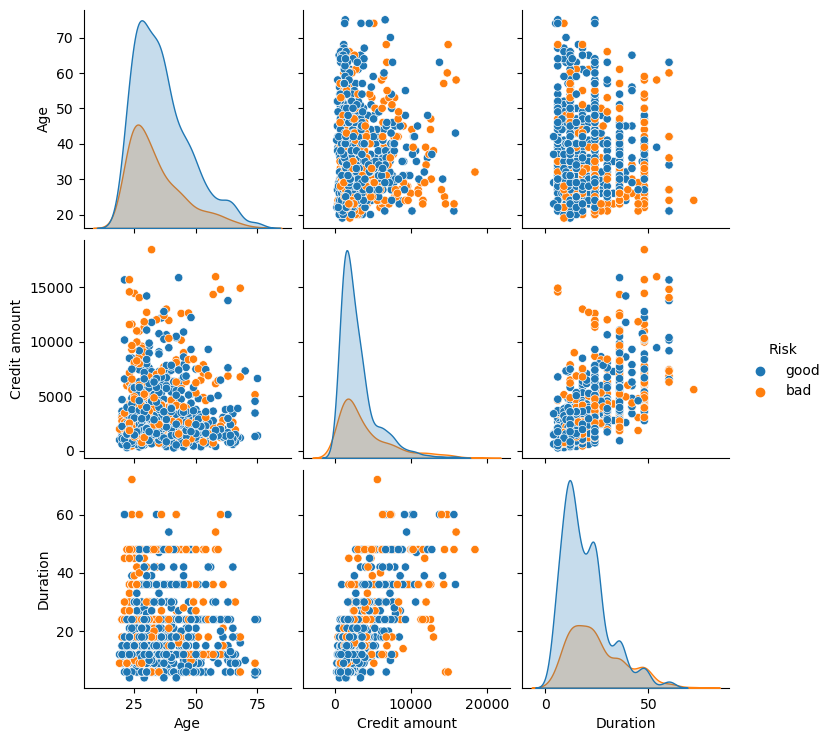

In [12]:
sb.pairplot(data = datos, vars = ['Age', 'Credit amount', 'Duration'], hue = 'Risk', kind = 'scatter')

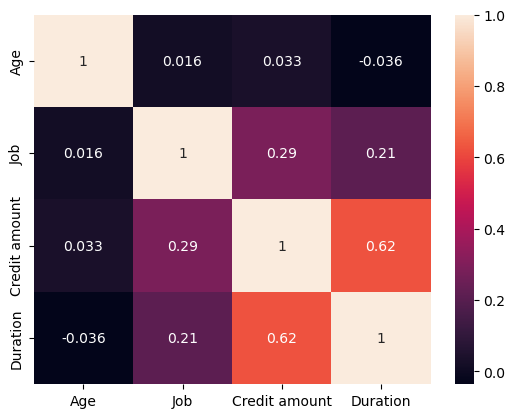

In [13]:
sb.heatmap(datos.corr(), annot = True)
plt.show()

In [14]:
#PREPARACIÓN DE DATOS
datos['Risk'] = np.where(datos['Risk'] == 'good', 0, 1)
datos.head()

,Age,Sex,Job,Housing,Saving accounts,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,1169,6,radio/TV,0
1,22,female,2,own,little,5951,48,radio/TV,1
2,49,male,1,own,little,2096,12,education,0
3,45,male,2,free,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,4870,24,car,1


In [15]:
X = datos.drop('Risk', axis = 1)
y = datos['Risk']

In [16]:
numCols = X.select_dtypes(include = ['float64', 'int64']).columns.to_list()
matCols = X[['Sex', 'Housing', 'Saving accounts']].columns.to_list()
ordCols = X[['Purpose']].columns.to_list()

In [17]:
numCols

['Age', 'Job', 'Credit amount', 'Duration']

In [18]:
matCols

['Sex', 'Housing', 'Saving accounts']

In [19]:
ordCols

['Purpose']

In [20]:
numTransformer = Pipeline(steps = [('scaler', MinMaxScaler())])
matTransformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])
ordTransformer = Pipeline(steps = [('ordinal', OrdinalEncoder(handle_unknown = 'error'))])

In [21]:
preprocesador = ColumnTransformer(transformers = [
    ('numeric', numTransformer, numCols),
    ('catOhe', matTransformer, matCols),
    ('catOrd', ordTransformer, ordCols)
], remainder = 'passthrough')

set_config(display = 'diagram')
preprocesador

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['Age', 'Job', 'Credit amount', 'Duration']),
                                ('catOhe',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'Housing', 'Saving accounts']),
                                ('catOrd',
                                 Pipeline(steps=[('ordinal',
                                                  OrdinalEncoder())]),
                                 ['Purpose'])])

In [22]:
Xpre = preprocesador.fit_transform(X)
Xpre

array([[0.85714286, 0.66666667, 0.05056674, ..., 0.        , 0.        ,
        5.        ],
       [0.05357143, 0.66666667, 0.31368989, ..., 0.        , 0.        ,
        5.        ],
       [0.53571429, 0.33333333, 0.10157368, ..., 0.        , 0.        ,
        3.        ],
       ...,
       [0.33928571, 0.66666667, 0.03048311, ..., 0.        , 0.        ,
        5.        ],
       [0.07142857, 0.66666667, 0.08776274, ..., 0.        , 0.        ,
        5.        ],
       [0.14285714, 0.66666667, 0.23803235, ..., 0.        , 0.        ,
        1.        ]])

In [23]:
codCat = preprocesador.named_transformers_['catOhe']['onehot'].get_feature_names(matCols)
codCat

array(['Sex_female', 'Sex_male', 'Housing_free', 'Housing_own',
       'Housing_rent', 'Saving accounts_little',
       'Saving accounts_moderate', 'Saving accounts_quite rich',
       'Saving accounts_rich'], dtype=object)

In [24]:
labels = np.concatenate([numCols, codCat, ordCols])
labels

array(['Age', 'Job', 'Credit amount', 'Duration', 'Sex_female',
       'Sex_male', 'Housing_free', 'Housing_own', 'Housing_rent',
       'Saving accounts_little', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich', 'Purpose'],
      dtype=object)

In [25]:
Xpro = pd.DataFrame(Xpre, columns = labels)
Xpro.head()

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Purpose
0,0.857143,0.666667,0.050567,0.029412,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0
1,0.053571,0.666667,0.313690,0.647059,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,5.0
2,0.535714,0.333333,0.101574,0.117647,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0
3,0.464286,0.666667,0.419941,0.558824,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4.0
4,0.607143,0.666667,0.254209,0.294118,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [26]:
Xpro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1000 non-null   float64
 1   Job                         1000 non-null   float64
 2   Credit amount               1000 non-null   float64
 3   Duration                    1000 non-null   float64
 4   Sex_female                  1000 non-null   float64
 5   Sex_male                    1000 non-null   float64
 6   Housing_free                1000 non-null   float64
 7   Housing_own                 1000 non-null   float64
 8   Housing_rent                1000 non-null   float64
 9   Saving accounts_little      1000 non-null   float64
 10  Saving accounts_moderate    1000 non-null   float64
 11  Saving accounts_quite rich  1000 non-null   float64
 12  Saving accounts_rich        1000 non-null   float64
 13  Purpose                     1000 n

In [27]:
#Separación en entrenamiento y prueba
XEntrenamiento, Xprueba, yEntrenamiento, yPrueba = train_test_split(Xpro, y, train_size = 0.7, random_state = 123)

In [28]:
XEntrenamiento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 498 to 510
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         700 non-null    float64
 1   Job                         700 non-null    float64
 2   Credit amount               700 non-null    float64
 3   Duration                    700 non-null    float64
 4   Sex_female                  700 non-null    float64
 5   Sex_male                    700 non-null    float64
 6   Housing_free                700 non-null    float64
 7   Housing_own                 700 non-null    float64
 8   Housing_rent                700 non-null    float64
 9   Saving accounts_little      700 non-null    float64
 10  Saving accounts_moderate    700 non-null    float64
 11  Saving accounts_quite rich  700 non-null    float64
 12  Saving accounts_rich        700 non-null    float64
 13  Purpose                     700 n

In [29]:
#MODELADO
modelo = SVC()
modelo.fit(XEntrenamiento, yEntrenamiento)

SVC()

In [30]:
modelo2 = MLPClassifier(hidden_layer_sizes = (10, 50, 5), learning_rate_init = 0.01)
modelo2.fit(XEntrenamiento, yEntrenamiento)

MLPClassifier(hidden_layer_sizes=(10, 50, 5), learning_rate_init=0.01)

In [31]:
#EVALUACIÓN
predSVCEntrenamiento = modelo.predict(XEntrenamiento)
predSVCPrueba = modelo.predict(Xprueba)
accuracySVCEntrenamiento = accuracy_score(yEntrenamiento, predSVCEntrenamiento)
accuracySVCPrueba = accuracy_score(yPrueba, predSVCPrueba)
print(f'El accuracy en Entrenamiento es: {accuracySVCEntrenamiento}')
print(f'El accuracy en Prueba es: {accuracySVCPrueba}')

El accuracy en Entrenamiento es: 0.7142857142857143
El accuracy en Prueba es: 0.6666666666666666


In [32]:
#EVALUACIÓN
predMLPEntrenamiento = modelo2.predict(XEntrenamiento)
predMLPPrueba = modelo2.predict(Xprueba)
accuracyMLPEntrenamiento = accuracy_score(yEntrenamiento, predMLPEntrenamiento)
accuracyMLPPrueba = accuracy_score(yPrueba, predMLPPrueba)
print(f'El accuracy en Entrenamiento es: {accuracyMLPEntrenamiento}')
print(f'El accuracy en Prueba es: {accuracyMLPPrueba}')

El accuracy en Entrenamiento es: 0.8242857142857143
El accuracy en Prueba es: 0.6333333333333333
